In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/sample_submission.csv
/kaggle/input/sentiment-analysis-dataset/train.csv
/kaggle/input/sentiment-analysis-dataset/test.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/sentiment-analysis-dataset/train.csv")

In [63]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.4 MB/s eta 0:00:00


In [92]:
import preprocessor as p
import string
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
import re
import contractions
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    text = text.lower()
    new_text =""
    text = text.replace("n`t", "n't")
    
    for word in text.split():
  # using contractions.fix to expand the shortened words
      new_text = new_text +" " + contractions.fix(word)
   
    text = new_text
    text = text.replace('[^\w\s]',' ').replace('\s\s+', ' ')
    stop_words = set(stopwords.words('english'))
    stop_words.remove("not")
    translator = str.maketrans('', '', string.punctuation)
    # Translate the input string using the translation table
    text = text.translate(translator)
    tokens = word_tokenize(text)
    tokens = [st.stem(word) for word in tokens]
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

In [93]:
df['tokens']= df.apply(preprocess_tweet, axis=1)

In [88]:
def split(row):
    return " ".join(row['tokens'])

In [97]:
df['text'] = df.apply(split, axis=1)

In [98]:
df['text']

0                                        good luck auction
1                          hmmyou not judg book look cover
2                  hello enjoy london watch hackney mental
3                               not even call belgium suck
4                                            not good mood
                               ...                        
24727    get closer log left hand swollen not wear wed ...
24728                                          drawn email
24729                                    oh duhi see thank
24730                      internet like th grade fast die
24731    content content content gah stori life right t...
Name: text, Length: 24732, dtype: object

In [80]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data


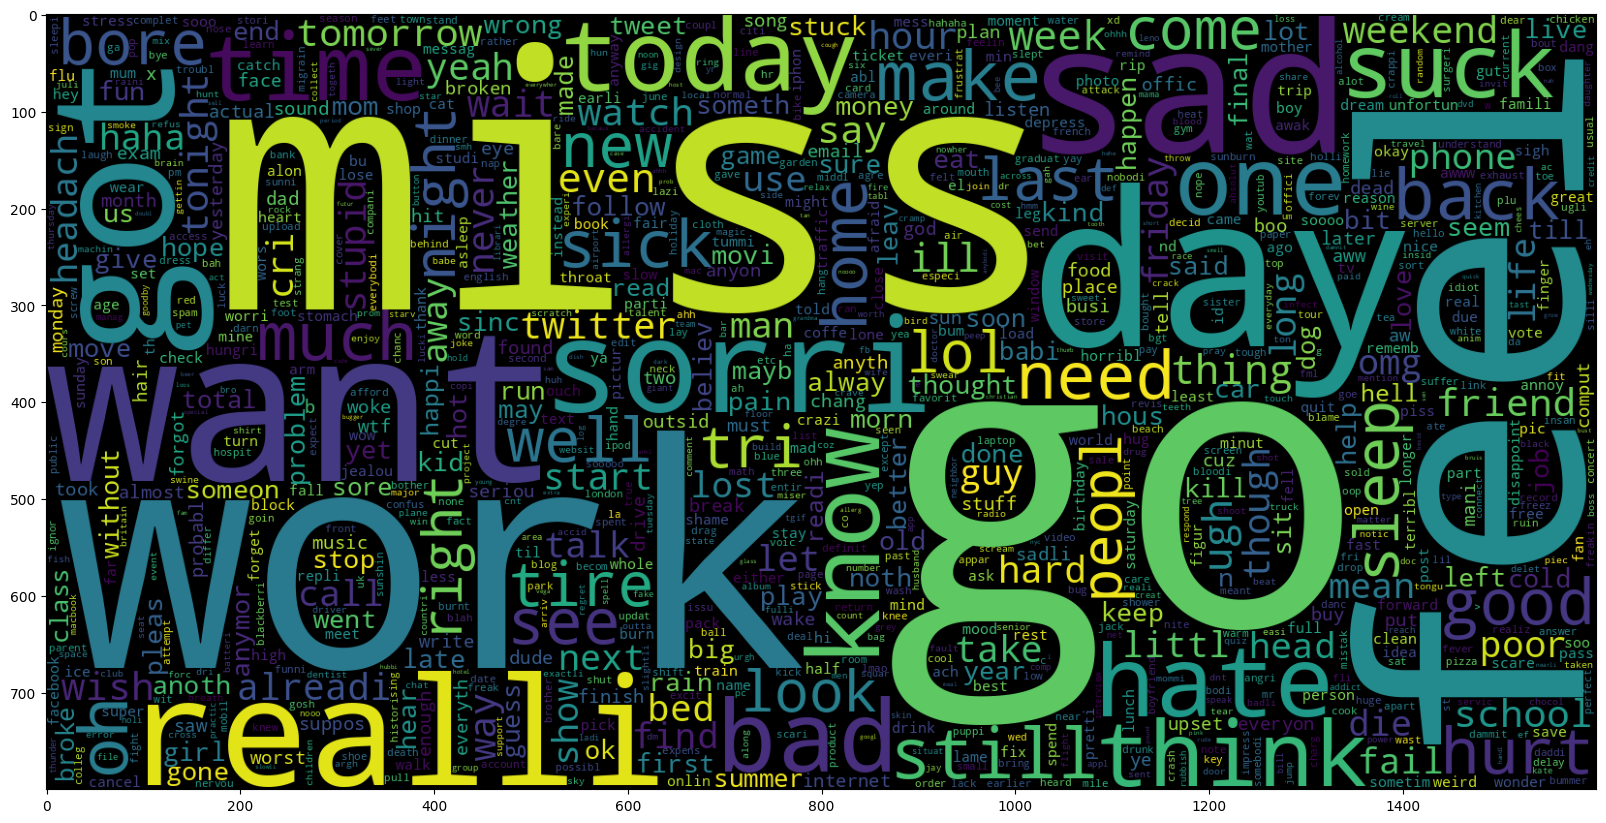

In [99]:
from wordcloud import WordCloud
data_neg = df[df['sentiment']=="negative"].text
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

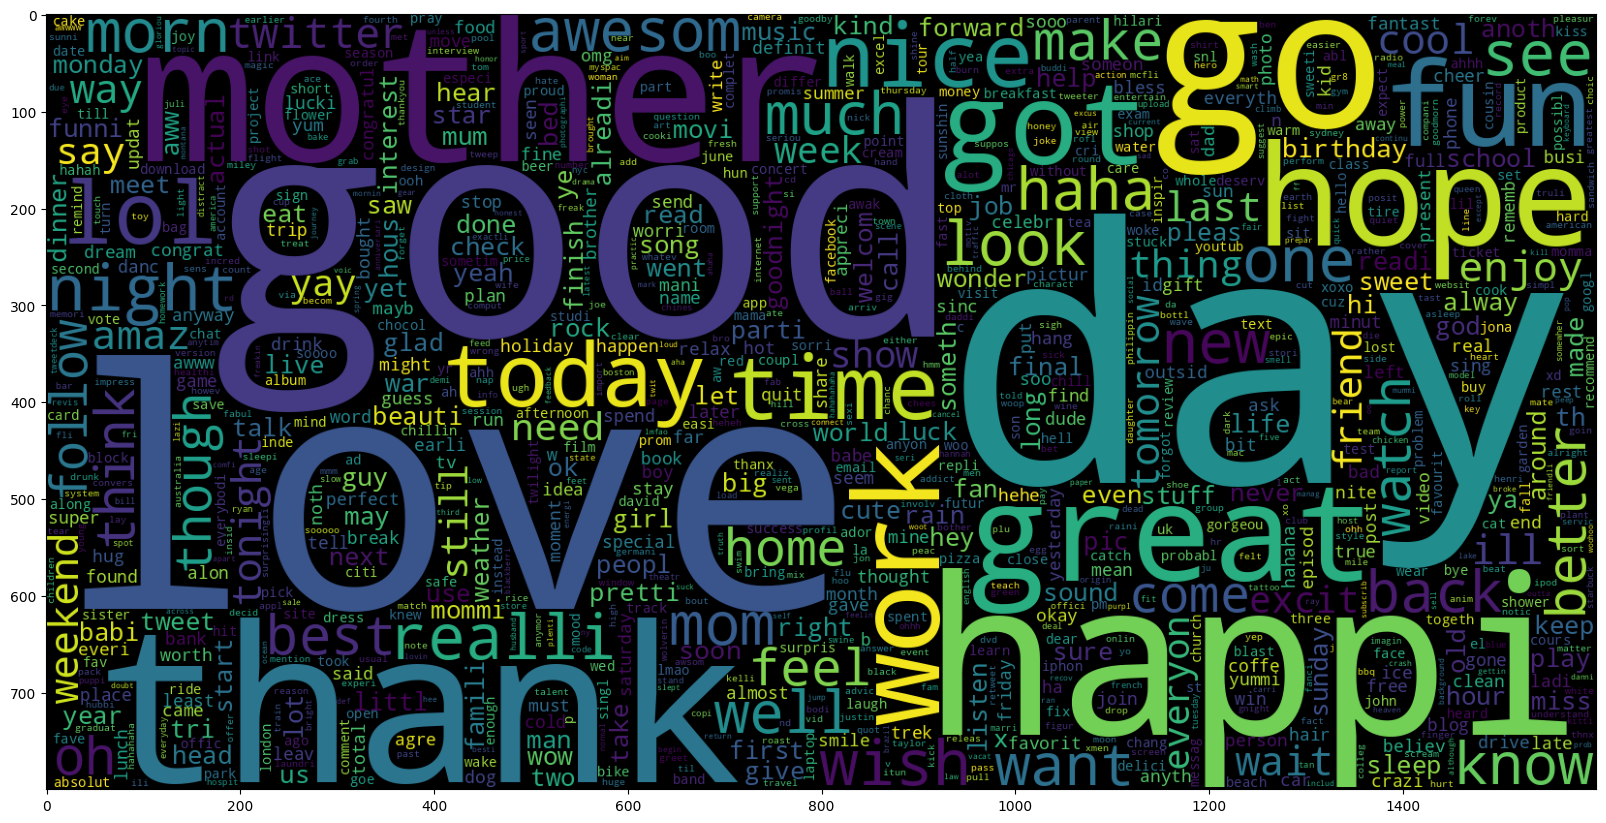

In [100]:
from wordcloud import WordCloud
data_pos = df[df['sentiment']=="positive"].text
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

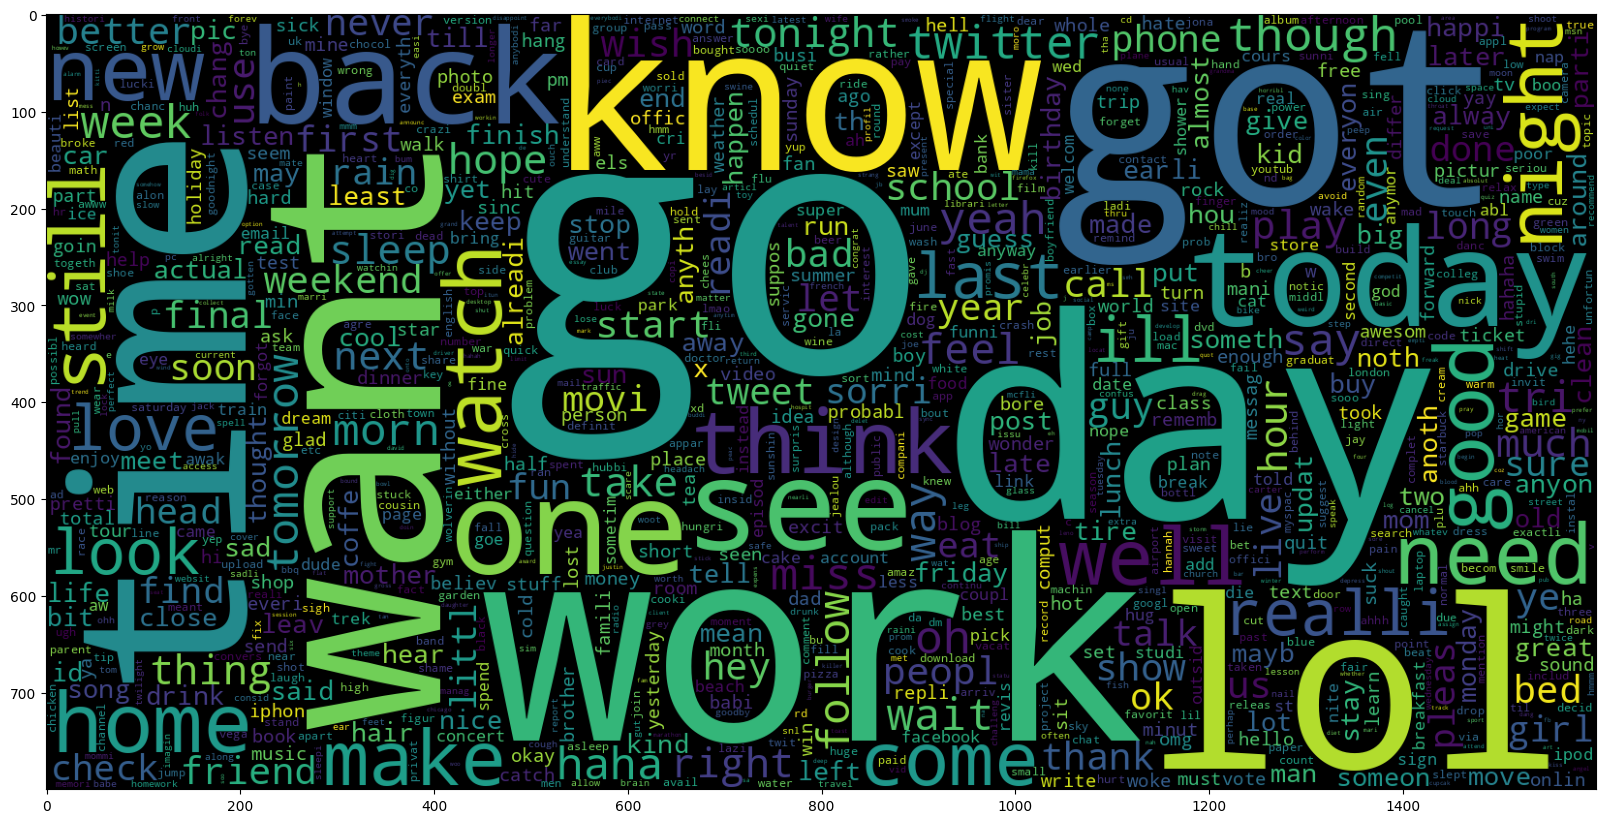

In [101]:
from wordcloud import WordCloud
data_neu = df[df['sentiment']=="neutral"].text
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neu))
plt.imshow(wc)

In [81]:
i =0
for index, row in df.iterrows():
    print(row['text'])
    print(row['tokens'])
    i+=1
    if i==10:
        break

 good luck with your auction
['good', 'luck', 'auction']
Hmm..You can`t judge a book by looking at its cover
['hmmyou', 'not', 'judge', 'book', 'looking', 'cover']
 Hello, yourself. Enjoy London. Watch out for the Hackneys. They`re mental.
['hello', 'enjoy', 'london', 'watch', 'hackneys', 'theyre', 'mental']
  We can`t even call you from belgium  sucks
['not', 'even', 'call', 'belgium', 'sucks']
not so good mood..
['not', 'good', 'mood']
Jumping im the shower after a long day of work  it shall feel ahmazing I CAN MATH!
['jumping', 'shower', 'long', 'day', 'work', 'shall', 'feel', 'ahmazing', 'math']
 OK! Oops sorry
['ok', 'oops', 'sorry']
says Finally, Im home.  http://plurk.com/p/rr121
['says', 'finally', 'home']
I am native, not french ! I hate this ! !  ! Trying to find animals in french, I SUCK, SOMEONE HELP PLEEEEEASE  ? Alone- Allison Iraheta ?
['native', 'not', 'french', 'hate', 'trying', 'find', 'animals', 'french', 'suck', 'someone', 'help', 'pleeeeease', 'alone', 'allison', '

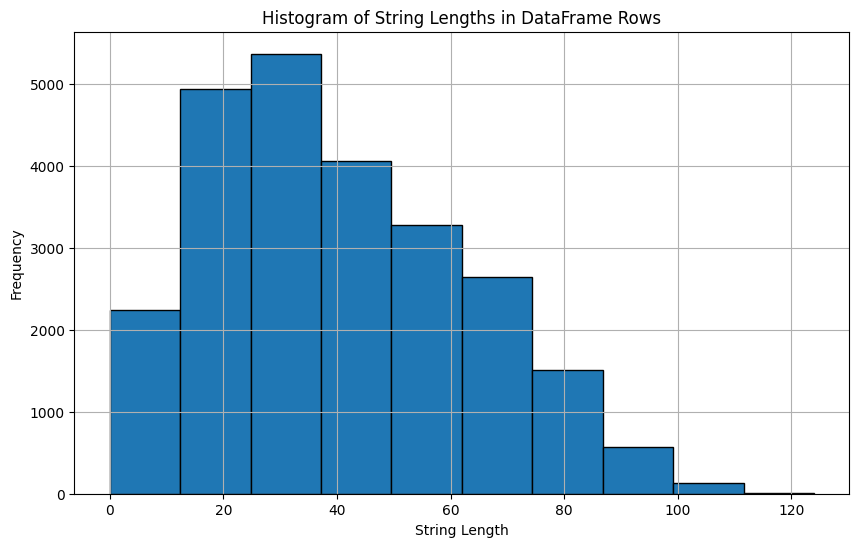

In [28]:
from matplotlib import pyplot as plt
df['length'] = df['cleaned_text'].apply(len)

# Plot the lengths
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=10, edgecolor='black')
plt.title('Histogram of String Lengths in DataFrame Rows')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

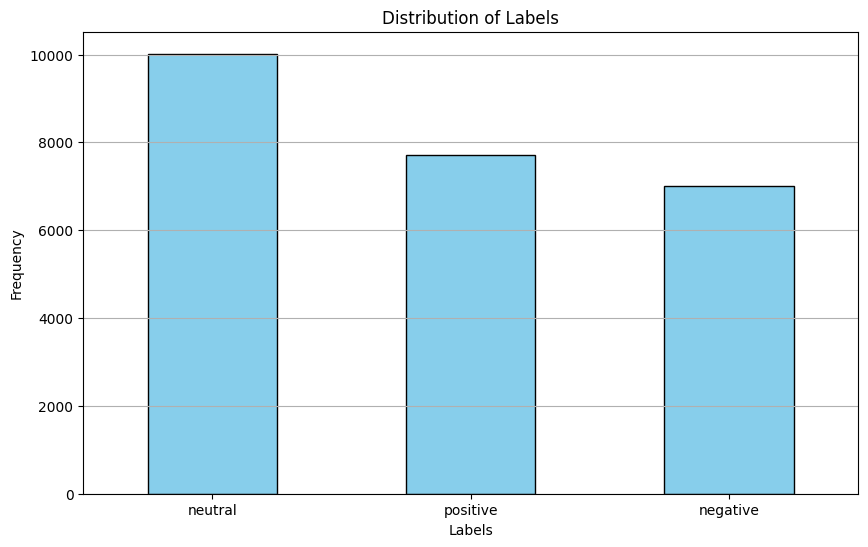

In [29]:
label_counts = df['sentiment'].value_counts()

# Plot the label distribution using a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()